Find the strike price corresponding to a specific delta for both call and put options using the Black-Scholes-Merton (BSM) model, we need to first define the delta of an option in the context of the BSM framework. The BSM model is a mathematical model for pricing an options contract by using the current stock price, the option's strike price, time to expiration, risk-free rate, and the stock's volatility. Delta, in this context, is the rate of change of the option's price with respect to the price of the underlying asset.


The formula for delta (Δ) in the BSM model is different for call and put options:

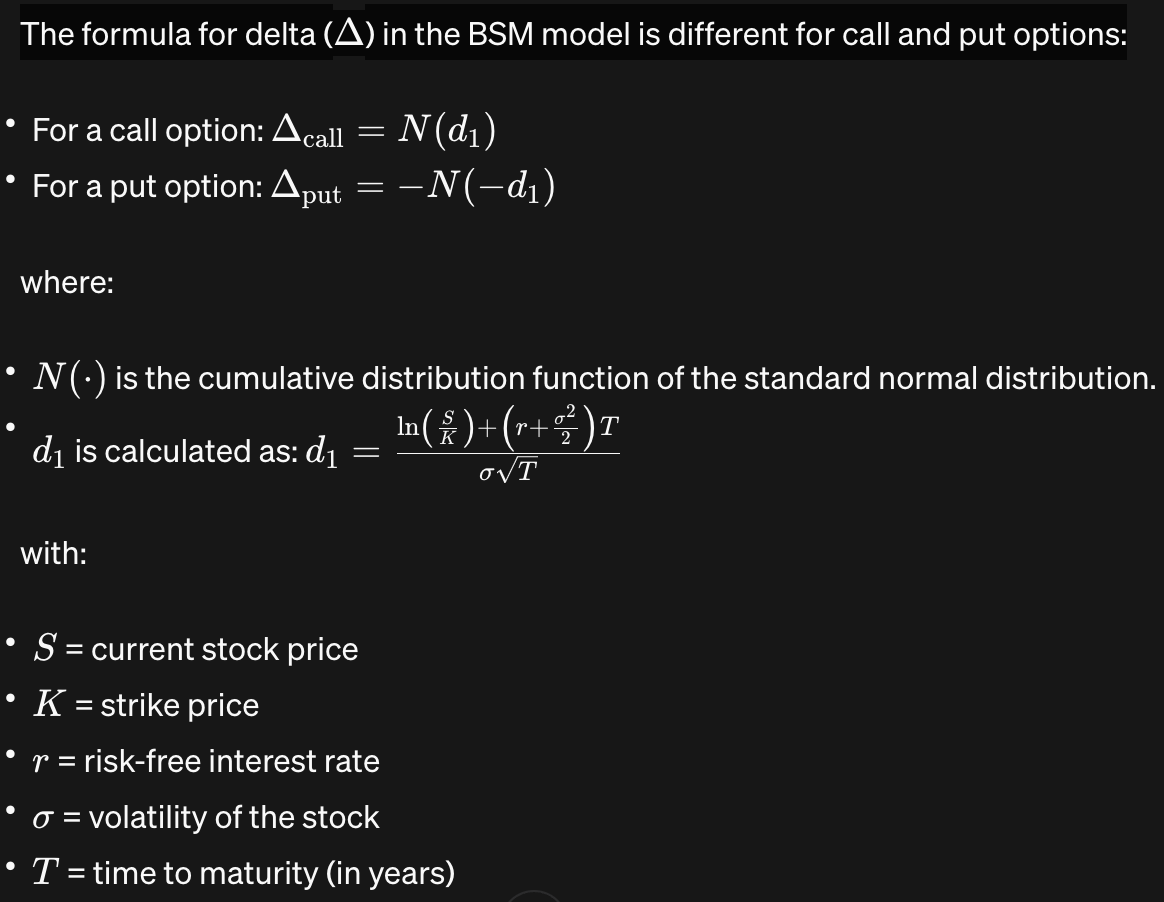

Given a specific delta, our goal is to find the strike price (K) that corresponds to this delta value. This involves solving the delta formula for K, which might not have a straightforward algebraic solution due to the nature of N(d1).  Therefore, we'll typically use numerical methods to find K. Let's proceed by defining a Python function that takes in the BSM parameters (excluding K), a target delta, and whether it's for a call or a put option, and then uses a numerical method to find the corresponding strike price.

We'll use the Newton-Raphson method for this numerical solution, which requires us to iteratively adjust our guess for K until we find a value that gives us the target delta. This involves computing the derivative of Δ with respect to K, known as the "vega" of the option, to adjust our guesses. However, given the complexity of directly solving for K using Δ, we'll implement an iterative search to find K that approximates the given delta value as closely as possible.

First, let's define the basic BSM functions for delta and the iterative method to find the strike price. The attempt to find the strike price corresponding to a specified delta for both call and put options encountered a convergence issue within the maximum number of iterations allowed. This issue may have arisen from the heuristic adjustment step in the find_strike_for_delta function, where the adjustment magnitude or direction may not have been optimal for all cases, leading to failure in converging to a solution.

To address this, we can refine our approach by employing a more robust numerical method that ensures convergence, such as the bisection method for a more stable search, or adjusting our initial guess and the method of adjusting K during iterations.

Let's revise our strategy to use a more systematic approach for adjusting K. We will implement a version that checks for convergence more carefully and adjusts the guess for K in a manner that is more likely to lead to convergence.

I'll update the implementation to make it more robust. Let's also ensure that our initial guess and adjustment strategy are conducive to finding a solution within a reasonable number of iterations. This example will demonstrate how to use the scipy.optimize.newton method to achieve our goal. The Newton method is chosen for its simplicity and effectiveness in many cases, although it requires a good initial guess and the function must be well-behaved.

The find_strike function takes as input the current stock price S, target delta, time to maturity T, risk-free rate r, stock volatility σ, and the option type. It then uses scipy.optimize.newton to find the strike price that gives the desired delta. The initial guess is set as the current stock price, which is generally a reasonable starting point for finding the strike price.

This approach provides a practical and efficient way to solve for the strike price corresponding to a given delta value, leveraging the power of numerical methods available in Python's scientific computing stack.

In [65]:
from scipy.stats import norm
from scipy.optimize import newton
import numpy as np
import pandas as pd

In [66]:
def bsm_delta(S, K, T, r, sigma, option_type='call'):
    """Calculate the Black-Scholes-Merton delta of an option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    else:  # option_type == 'put'
        return -norm.cdf(-d1)

def find_strike(S, target_delta, T, r, sigma, option_type='call'):
    """Find the strike price for a given delta using Newton's method."""
    # Function to find the root of. Sets the difference between the target delta
    # and the BSM delta to zero.
    def root_function(K):
        return bsm_delta(S, K, T, r, sigma, option_type) - target_delta
    
    # Initial guess for K. A reasonable starting point is the stock price.
    initial_guess = S
    
    # Use Newton's method to find the root.
    K_found = newton(root_function, initial_guess)
    return K_found

In [67]:
# Example usage
S = 100  # Current stock price
T = 1    # Time to maturity (1 year)
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility of the stock
target_delta_call = 0.5  # Target delta for call
target_delta_put = -0.5  # Target delta for put

In [68]:
strike_for_call = find_strike(S, target_delta_call, T, r, sigma, 'call')
strike_for_put = find_strike(S, target_delta_put, T, r, sigma, 'put')
print(f"Strike price for target delta {target_delta_call} (call): {strike_for_call}")
print(f"Strike price for target delta {target_delta_put} (put): {strike_for_put}")

Strike price for target delta 0.5 (call): 107.25081812542165
Strike price for target delta -0.5 (put): 107.25081812542166


To calculate call and put option prices using the Black-Scholes-Merton model for the found strike prices (strike_for_call and strike_for_put), we will use the Black-Scholes formula. Afterwards, I will present the results in a tabular format, including the strike prices for call and put options, and their respective prices.

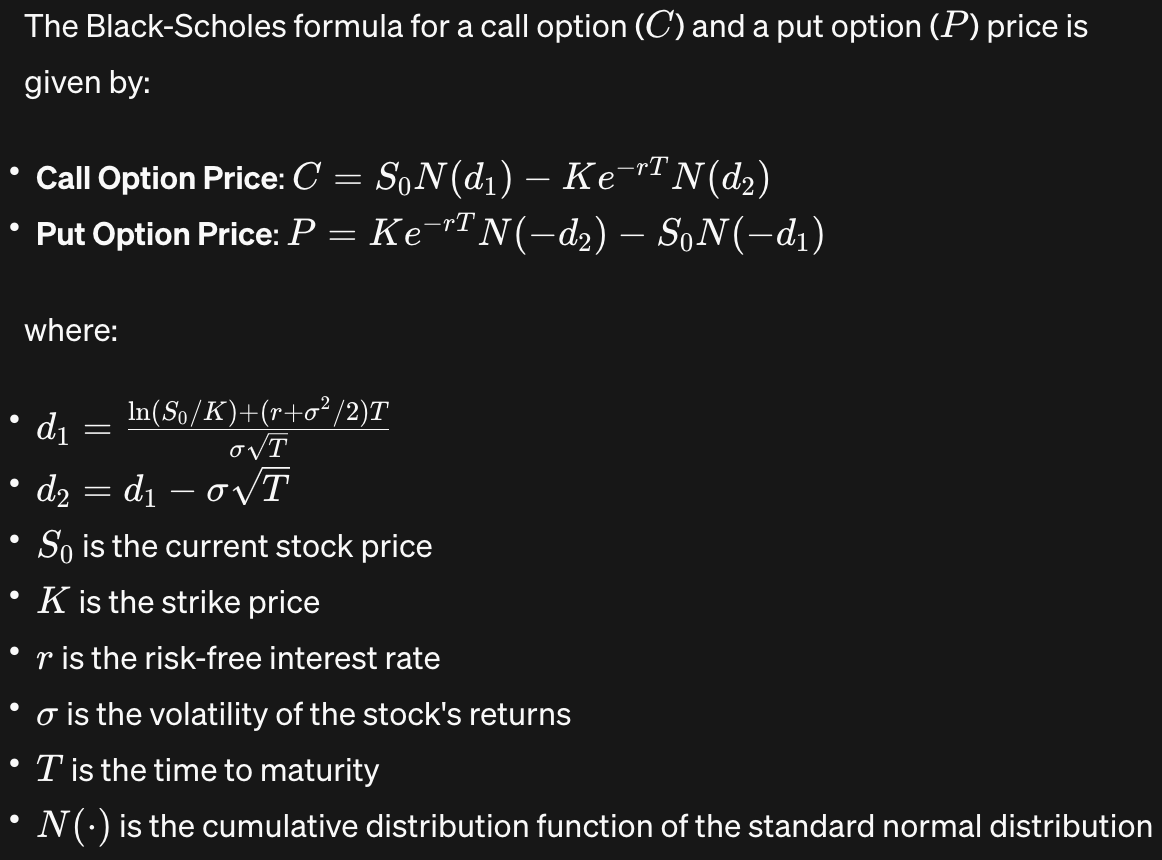

In [69]:
# Black-Scholes-Merton model for option pricing
def bsm_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # option_type == 'put'
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# Function to calculate option prices and strike prices for given parameters
def calculate_option_prices_and_strikes(row):
    # Calculate strikes for call and put
    strike_for_call = find_strike(row['S'], target_delta_call, row['T'], row['r'], row['sigma'], 'call')
    strike_for_put = find_strike(row['S'], target_delta_put, row['T'], row['r'], row['sigma'], 'put')
    
    # Calculate option prices
    call_price = bsm_price(row['S'], strike_for_call, row['T'], row['r'], row['sigma'], 'call')
    put_price = bsm_price(row['S'], strike_for_put, row['T'], row['r'], row['sigma'], 'put')
    
    return pd.Series([strike_for_call, call_price, strike_for_put, put_price])

In [70]:
# Calculate strike prices for call and put
strike_for_call = find_strike(S, target_delta_call, T, r, sigma, 'call')
strike_for_put = find_strike(S, target_delta_put, T, r, sigma, 'put')

# Calculate option prices
call_price = bsm_price(S, strike_for_call, T, r, sigma, 'call')
put_price = bsm_price(S, strike_for_put, T, r, sigma, 'put')

In [71]:
results = pd.DataFrame({
    'Option Type': ['Call', 'Put'],
    'Strike Price': [strike_for_call, strike_for_put],
    'Option Price': [call_price, put_price]
})

results

,Option Type,Strike Price,Option Price
0,Call,107.250818,7.076019
1,Put,107.250818,9.096153


In [72]:
# Creating a DataFrame with historical fake data
df = pd.DataFrame({
    'S': [100, 105, 110, 95, 90],  # Stock prices
    'T': [1, 0.5, 0.25, 1.5, 2],  # Time to maturity in years
    'r': [0.05, 0.05, 0.04, 0.06, 0.05],  # Risk-free interest rates
    'sigma': [0.2, 0.25, 0.3, 0.2, 0.15]  # Volatility
})
df

,S,T,r,sigma
0,100,1.00,0.05,0.20
1,105,0.50,0.05,0.25
2,110,0.25,0.04,0.30
3,95,1.50,0.06,0.20
4,90,2.00,0.05,0.15


In [73]:
# Assuming target deltas for call and put options
target_delta_call = 0.5
target_delta_put = -0.5

In [74]:
# Apply the function to each row and create a new DataFrame with results
option_data = df.apply(calculate_option_prices_and_strikes, axis=1)
option_data.columns = ['Strike Price for Call', 'Call Option Price', 'Strike Price for Put', 'Put Option Price']
# Combine the new option data with the original DataFrame
combined_df = pd.concat([df, option_data], axis=1)
combined_df

,S,T,r,sigma,Strike Price for Call,Call Option Price,Strike Price for Put,Put Option Price
0,100,1.00,0.05,0.20,107.250818,7.076019,107.250818,9.096153
1,105,0.50,0.05,0.25,109.353456,6.655853,109.353456,8.309363
2,110,0.25,0.04,0.30,112.362513,6.009896,112.362513,7.254383
3,95,1.50,0.06,0.20,107.112201,8.024774,107.112201,10.917954
4,90,2.00,0.05,0.15,101.728721,6.707866,101.728721,8.755819


### Graphical User Interface (GUI)
Develop a GUI for your tools, making them more accessible to users who may not be comfortable with programming. This can also facilitate quicker analyses and decision-making.
- Objective: Make the tools more accessible through a user-friendly interface.
- Methodology: Design and implement a GUI using frameworks like PyQt, Tkinter, or web-based interfaces with Flask/Django for Python. The interface should allow users to input parameters (e.g., stock price, volatility, dividends) and display results such as option prices, Greeks, and sensitivity analyses. Incorporate interactive elements for visual data exploration.

App where users can choose an underlying asset, start and end dates, and a target delta. 

Upon input and button click, the app will display historical spot prices, implied volatility, risk-free rate data, and a graph of call and put option prices alongside the spot prices.

- ipywidgets for creating interactive widgets in Jupyter notebooks.
- voila for turning Jupyter notebooks into standalone web applications.
- bokeh for creating interactive plots.

1. Interactive widgets for user inputs including a ticker symbol, expiry date for options, delta, and a button to trigger updates.
2. The Black-Scholes-Merton (BSM) model functions for option pricing.
3. A mechanism to fetch implied volatility (placeholder function provided).
4. A Bokeh plot to visualize the spot price, call, and put option prices.
5. A data table displaying the calculated option strikes and prices.
6. A download button allowing the user to export the data table content as a CSV file.

In [75]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Range1d, LinearAxis, DataRange1d
from bokeh.layouts import column
from datetime import datetime
output_notebook()

Loading BokehJS ...

In [ ]:
# Dummy data retrieval function
def get_historical_data(underlying, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = pd.DataFrame({
        'Date': dates,
        'Spot': np.random.normal(100, 5, len(dates)),
        'Volatility': np.random.normal(0.2, 0.02, len(dates)),
        'RiskFreeRate': np.random.normal(0.05, 0.01, len(dates))
    })
    return data

# Option pricing calculation placeholder
def calculate_option_prices(spot, volatility, risk_free_rate, delta, option_type='call'):
    # Placeholder for real option pricing logic
    return np.random.normal(10, 2, len(spot))

# Widget definitions
underlying_selector = widgets.Dropdown(options=['Asset 1', 'Asset 2'], description='Underlying:')
start_date_picker = widgets.DatePicker(description='Start Date:', value=pd.to_datetime('2021-01-01'))
end_date_picker = widgets.DatePicker(description='End Date:', value=pd.to_datetime('2021-06-01'))
delta_input = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='Target Delta:')
submit_button = widgets.Button(description='Calculate', button_style='success', tooltip='Click to calculate')

# Event handler for the submit button
def on_submit_button_clicked(b):
    # Data retrieval
    data = get_historical_data(underlying_selector.value, start_date_picker.value, end_date_picker.value)
    
    # Calculate option prices
    call_prices = calculate_option_prices(data['Spot'], data['Volatility'], data['RiskFreeRate'], delta_input.value, 'call')
    put_prices = calculate_option_prices(data['Spot'], data['Volatility'], data['RiskFreeRate'], delta_input.value, 'put')
    
    data['CallPrice'] = call_prices
    data['PutPrice'] = put_prices
    
    # Bokeh plot
    source = ColumnDataSource(data)
    p = figure(width=800, height=400, x_axis_type="datetime", title="Option Prices and Spot Price")
    p.line('Date', 'Spot', source=source, legend_label='Spot Price', color='blue')
    
    # Extra Y-axis for option prices
    p.extra_y_ranges = {"option_prices": Range1d(start=min(min(call_prices), min(put_prices)), end=max(max(call_prices), max(put_prices)))}
    
    # Correct way to add a new y-axis using the extra range
    p.add_layout(LinearAxis(y_range_name="option_prices"), 'right')
    
    p.line('Date', 'CallPrice', source=source, legend_label='Call Price', color='green', y_range_name="option_prices")
    p.line('Date', 'PutPrice', source=source, legend_label='Put Price', color='red', y_range_name="option_prices")
    
    show(p)

submit_button.on_click(on_submit_button_clicked)

# Layout
widgets.VBox([underlying_selector, start_date_picker, end_date_picker, delta_input, submit_button])


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Range1d, LinearAxis, DataRange1d
from bokeh.layouts import column
from datetime import datetime
output_notebook()

# Dummy function for data retrieval
def get_historical_data(underlying, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = pd.DataFrame({
        'Date': dates,
        'Spot': np.random.normal(100, 5, len(dates)),
        'Volatility': np.random.normal(0.2, 0.02, len(dates)),
        'RiskFreeRate': np.random.normal(0.05, 0.01, len(dates))
    })
    return data

# Dummy function for option pricing calculation
def calculate_option_prices(spot, volatility, risk_free_rate, delta, option_type='call'):
    return np.random.normal(10, 2, len(spot))

# Widget definitions
underlying_selector = widgets.Dropdown(options=['Asset 1', 'Asset 2'], description='Underlying:')
start_date_picker = widgets.DatePicker(description='Start Date:', value=pd.to_datetime('2021-01-01'))
end_date_picker = widgets.DatePicker(description='End Date:', value=pd.to_datetime('2021-06-01'))
delta_input = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='Target Delta:')
submit_button = widgets.Button(description='Calculate', button_style='success', tooltip='Click to calculate')

# Event handler for the submit button
def on_submit_button_clicked(b):
    data = get_historical_data(underlying_selector.value, start_date_picker.value, end_date_picker.value)
    
    call_prices = calculate_option_prices(data['Spot'], data['Volatility'], data['RiskFreeRate'], delta_input.value, 'call')
    put_prices = calculate_option_prices(data['Spot'], data['Volatility'], data['RiskFreeRate'], delta_input.value, 'put')
    
    data['CallPrice'] = call_prices
    data['PutPrice'] = put_prices
    
    source = ColumnDataSource(data)
    p = figure(width=800, height=400, x_axis_type="datetime", title="Option Prices and Spot Price")
    
    # Spot price line
    p.line('Date', 'Spot', source=source, legend_label='Spot Price', color='blue')
    
    # Automatically adjust ranges with padding
    padding = 0.05
    p.y_range = DataRange1d(range_padding=padding)
    
    # Extra Y-axis for option prices
    p.extra_y_ranges = {"option_prices": DataRange1d(range_padding=padding)}
    p.add_layout(LinearAxis(y_range_name="option_prices"), 'right')

    # Option price lines
    p.line('Date', 'CallPrice', source=source, legend_label='Call Price', color='green', y_range_name="option_prices")
    p.line('Date', 'PutPrice', source=source, legend_label='Put Price', color='red', y_range_name="option_prices")
    
    show(p)

submit_button.on_click(on_submit_button_clicked)

# Layout
display(widgets.VBox([underlying_selector, start_date_picker, end_date_picker, delta_input, submit_button]))


In [ ]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.io import push_notebook
from scipy.stats import norm
from scipy.optimize import newton
import datetime

output_notebook()

# Define BSM functions as provided in the previous instructions
# - bsm_delta
# - find_strike
# - bsm_price

# Initialize ColumnDataSource
source = ColumnDataSource(data={'date': [], 'spot': [], 'call_price': [], 'put_price': []})

# Create initial empty plot
p = figure(width=700, height=300, x_axis_type='datetime')
p.line(x='date', y='spot', source=source, color='blue', legend_label='Spot Price')
p.line(x='date', y='call_price', source=source, color='green', legend_label='Call Price', y_range_name="option_prices")
p.line(x='date', y='put_price', source=source, color='red', legend_label='Put Price', y_range_name="option_prices")

# Extra y-range for option prices
p.extra_y_ranges = {"option_prices": Range1d(start=0, end=10)}
p.add_layout(LinearAxis(y_range_name="option_prices"), 'right')

handle = show(p, notebook_handle=True)

# Define widgets
start_date_picker = widgets.DatePicker(description='Start Date', value=datetime.date.today() - datetime.timedelta(days=30))
end_date_picker = widgets.DatePicker(description='End Date', value=datetime.date.today())
delta_input = widgets.FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='Target Delta:')
update_button = widgets.Button(description='Update Plot')

from bokeh.models import DataRange1d

# Assuming 'p' is your figure and 'source' is your ColumnDataSource
def update_plot(button):
    try:
        # Fetch or calculate your new data here
        dates = pd.date_range(start=start_date_picker.value, end=end_date_picker.value, freq='D')
        spot_prices = np.random.rand(len(dates)) * 100  # Example spot prices
        
        # Placeholder for BSM option price calculations
        # Calculate your call_prices and put_prices based on the BSM model here
        call_prices = np.random.rand(len(dates)) * 10 + 90  # Dummy call prices for demonstration
        put_prices = np.random.rand(len(dates)) * 10 + 80  # Dummy put prices for demonstration
        
        # Update the data source with new data
        source.data = {
            'date': dates,
            'spot': spot_prices,
            'call_price': call_prices,
            'put_price': put_prices
        }
        
        # Dynamically adjust primary y-axis (spot prices) based on spot data
        min_spot_price, max_spot_price = min(spot_prices), max(spot_prices)
        p.y_range.start = min_spot_price - (max_spot_price - min_spot_price) * 0.1  # Add some padding
        p.y_range.end = max_spot_price + (max_spot_price - min_spot_price) * 0.1

        # Dynamically adjust secondary y-axis (option prices) based on option data
        min_option_price = min(min(call_prices), min(put_prices))
        max_option_price = max(max(call_prices), max(put_prices))
        p.extra_y_ranges["option_prices"].start = min_option_price - (max_option_price - min_option_price) * 0.1
        p.extra_y_ranges["option_prices"].end = max_option_price + (max_option_price - min_option_price) * 0.1
        
        push_notebook(handle=handle)
    
    except Exception as e:
        print(f"Error updating plot: {e}")

update_button.on_click(update_plot)

# Display widgets
widgets.VBox([start_date_picker, end_date_picker, delta_input, update_button])

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import DataTable, TableColumn, Button, CustomJS, DateFormatter
from bokeh.layouts import column
import multitasking

# Initialization
multitasking.set_max_threads(1)
output_notebook()

# Fetch stock data
def fetch_stock_data(ticker='AAPL', days_back=365):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days_back)
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print("Failed to fetch data.")
        return pd.DataFrame()
    return data

# Prepare data for plotting
def prepare_data(data):
    dates = pd.to_datetime(data.index)
    closes = data['Adj Close']
    return {'date': dates, 'close': closes}

# Initialize Bokeh plot and data table
source = ColumnDataSource(data={'date': [], 'close': []})
p = figure(width=800, height=400, x_axis_type="datetime", title="Stock Closing Prices")
p.line('date', 'close', source=source, legend_label="Close Price", line_width=2)

columns = [
    TableColumn(field="date", title="Date", formatter=DateFormatter()),
    TableColumn(field="close", title="Close Price"),
]
data_table = DataTable(source=source, columns=columns, width=800, height=280)

# CustomJS for CSV download
download_js = """
function table_to_csv(source) {
    const columns = Object.keys(source.data);
    const nrows = source.get_length();
    const lines = [columns.join(',')];
    for (let i = 0; i < nrows; i++) {
        let row = [];
        for (let col of columns) {
            row.push(source.data[col][i].toString());
        }
        lines.push(row.join(','));
    }
    return lines.join('\\n').concat('\\n');
}
const filename = 'stock_data.csv';
const filetext = table_to_csv(source);
const blob = new Blob([filetext], { type: 'text/csv;charset=utf-8;' });
const link = document.createElement('a');
link.href = URL.createObjectURL(blob);
link.download = filename;
link.target = '_blank';
link.style.visibility = 'hidden';
document.body.appendChild(link);
link.click();
document.body.removeChild(link);
"""

download_button = Button(label="Download CSV", button_type="success")
download_button.js_on_click(CustomJS(args={'source': source}, code=download_js))

# Function to update plot and data table
def update():
    ticker = 'AAPL'  # Or use widget to get user input
    data = fetch_stock_data(ticker)
    if not data.empty:
        new_data = prepare_data(data)
        source.data = new_data
        p.title.text = f"{ticker} Stock Closing Prices"

# Display the update button, plot, and data table
update()  # Initial update to load data
show(column(p, data_table, download_button), notebook_handle=True)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import yfinance as yf
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource

# Initialize notebook output for Bokeh
output_notebook()

# Prepare the initial empty plot
source = ColumnDataSource(data={'date': [], 'close': []})
p = figure(width=700, height=300, x_axis_type="datetime")
p.line(x='date', y='close', source=source)

# Function to fetch data and update plot
def update_plot(ticker, start_date, end_date, delta):
    data = yf.download(ticker, start=start_date, end=end_date)
    source.data = {
        'date': data.index,
        'close': data['Adj Close']
    }
    # Update plot title
    p.title.text = f"{ticker} Closing Prices: {start_date} to {end_date}"
    push_notebook()

# Widgets for user inputs
ticker_input = widgets.Dropdown(
    options=['AAPL', 'GOOG', 'MSFT', 'AMZN'],
    value='AAPL',
    description='Ticker:',
)
start_date_input = widgets.DatePicker(description='Start Date:', value=datetime.now() - timedelta(365))
end_date_input = widgets.DatePicker(description='End Date:', value=datetime.now())
delta_input = widgets.FloatSlider(description='Delta:', min=0, max=1, step=0.01, value=0.5)

# Button to trigger the update
update_button = widgets.Button(description='Update Plot')

# Display widgets
widgets_ui = widgets.VBox([ticker_input, start_date_input, end_date_input, delta_input, update_button])
display(widgets_ui)

# Show the initial plot (it will be empty until the update button is clicked)
show(p, notebook_handle=True)

# Define the button click callback
def on_update_button_clicked(b):
    # Clear previous plot output
    clear_output(wait=True)
    display(widgets_ui)
    show(p, notebook_handle=True)
    
    # Call the function to update the plot
    update_plot(
        ticker_input.value,
        start_date_input.value,
        end_date_input.value,
        delta_input.value
    )

# Bind the callback function to the update button
update_button.on_click(on_update_button_clicked)


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import DataTable, TableColumn, DateFormatter
from bokeh.layouts import column as bokeh_column
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialization
output_notebook()

# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Bokeh plot and DataTable update function
def update_plot(ticker='AAPL', start_date=(datetime.now() - timedelta(days=365)).date(), end_date=datetime.now().date(), delta=0.5):
    # Fetching the stock data
    df = fetch_stock_data(ticker, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
    if df.empty:
        print("Failed to fetch data.")
        return

    # Placeholder for option pricing logic
    df['Call Price'] = df['Adj Close'] * delta  # Placeholder for call price calculation
    df['Put Price'] = df['Adj Close'] * (1 - delta)  # Placeholder for put price calculation
    
    # Update ColumnDataSource for Bokeh plot and DataTable
    source.data = {
        'date': df.index,
        'close': df['Adj Close'],
        'call_price': df['Call Price'],
        'put_price': df['Put Price']
    }

# Creating ColumnDataSource
source = ColumnDataSource(data={'date': [], 'close': [], 'call_price': [], 'put_price': []})

# Creating the Bokeh plot
plot = figure(width=800, height=400, x_axis_type="datetime", title="Stock and Option Prices")
plot.line('date', 'close', source=source, color="blue", legend_label="Stock Price")
plot.line('date', 'call_price', source=source, color="green", legend_label="Call Option Price")
plot.line('date', 'put_price', source=source, color="red", legend_label="Put Option Price")

# Creating the DataTable
columns = [
    TableColumn(field="date", title="Date", formatter=DateFormatter()),
    TableColumn(field="close", title="Stock Price"),
    TableColumn(field="call_price", title="Call Option Price"),
    TableColumn(field="put_price", title="Put Option Price"),
]
data_table = DataTable(source=source, columns=columns, width=800)

# Widgets for inputs
ticker_input = widgets.Dropdown(options=['AAPL', 'GOOG', 'MSFT', 'AMZN'], value='AAPL', description='Ticker:')
start_date_input = widgets.DatePicker(description='Start Date:', value=datetime.now() - timedelta(days=365))
end_date_input = widgets.DatePicker(description='End Date:', value=datetime.now())
delta_input = widgets.FloatSlider(description='Delta:', min=0.0, max=1.0, step=0.01, value=0.5)

# Button for updating the plot and table
update_button = widgets.Button(description='Update Plot')

# Display function for widgets and Bokeh plot
def display_app():
    ui = widgets.VBox([ticker_input, start_date_input, end_date_input, delta_input, update_button])
    display(ui)
    
    # Handler to update plot and table
    def on_button_clicked(b):
        update_plot(ticker_input.value, start_date_input.value, end_date_input.value, delta_input.value)
        clear_output(wait=True)
        display(ui)
        show(bokeh_column(plot, data_table), notebook_handle=True)
    
    update_button.on_click(on_button_clicked)

display_app()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialization
output_notebook()

# Create the initial plot with an extra y-axis
source = ColumnDataSource(data={'date': [], 'close': [], 'call_price': [], 'put_price': []})
plot = figure(width=800, height=400, x_axis_type="datetime", title="Stock and Option Prices")
plot.extra_y_ranges = {"option_prices": Range1d(start=0, end=200)}
plot.add_layout(LinearAxis(y_range_name="option_prices"), 'right')

# Plot stock price
plot.line(x='date', y='close', source=source, color="blue", legend_label="Stock Price")

# Plot option prices on the extra y-axis
plot.line(x='date', y='call_price', source=source, color="green", legend_label="Call Option Price", y_range_name="option_prices")
plot.line(x='date', y='put_price', source=source, color="red", legend_label="Put Option Price", y_range_name="option_prices")

# Update plot and table function
def update_plot(ticker='AAPL', start_date=(datetime.now() - timedelta(days=365)).date(), end_date=datetime.now().date(), delta=0.5):
    data = yf.download(ticker, start=start_date, end=end_date)
    # Placeholder for real option pricing
    call_prices = data['Adj Close'] * delta
    put_prices = data['Adj Close'] * (1 - delta)
    
    # Update data source
    source.data = {
        'date': data.index,
        'close': data['Adj Close'],
        'call_price': call_prices,
        'put_price': put_prices,
    }
    
    # Auto-adjust y-axes
    plot.y_range.start = min(data['Adj Close']) * 0.95
    plot.y_range.end = max(data['Adj Close']) * 1.05
    plot.extra_y_ranges["option_prices"].start = min(min(call_prices), min(put_prices)) * 0.95
    plot.extra_y_ranges["option_prices"].end = max(max(call_prices), max(put_prices)) * 1.05
    
    push_notebook()

# Widgets for user inputs
ticker_input = widgets.Dropdown(options=['AAPL', 'GOOG', 'MSFT', 'AMZN'], value='AAPL', description='Ticker:')
start_date_input = widgets.DatePicker(description='Start Date:', value=(datetime.now() - timedelta(365)).date())
end_date_input = widgets.DatePicker(description='End Date:', value=datetime.now().date())
delta_input = widgets.FloatSlider(description='Delta:', min=0.0, max=1.0, step=0.01, value=0.5)

# Update button
update_button = widgets.Button(description='Update Plot')

# Display function for widgets and Bokeh plot
def display_app():
    ui = widgets.VBox([ticker_input, start_date_input, end_date_input, delta_input, update_button])
    display(ui)
    
    # Handler to update plot
    def on_button_clicked(b):
        update_plot(
            ticker=ticker_input.value,
            start_date=start_date_input.value,
            end_date=end_date_input.value,
            delta=delta_input.value
        )
        clear_output(wait=True)
        display(ui)
        show(plot, notebook_handle=True)
    
    update_button.on_click(on_button_clicked)

# Initial display
display_app()
show(plot, notebook_handle=True)


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import DataTable, TableColumn, DateFormatter, LinearAxis, Range1d
from bokeh.layouts import column as bokeh_column, layout
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialization
output_notebook()

# Function to fetch stock data and calculate option prices
def fetch_and_update_data(ticker, start_date, end_date, delta):
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print("Failed to fetch data.")
        return None
    data['Call Price'] = data['Adj Close'] * delta  # Placeholder for call price calculation
    data['Put Price'] = data['Adj Close'] * (1 - delta)  # Placeholder for put price calculation
    return data

# Create the initial plot with an extra y-axis
source = ColumnDataSource(data={'date': [], 'close': [], 'call_price': [], 'put_price': []})
plot = figure(width=800, height=400, x_axis_type="datetime", title="Stock and Option Prices")
plot.extra_y_ranges = {"option_prices": Range1d(start=0, end=200)}
plot.add_layout(LinearAxis(y_range_name="option_prices"), 'right')

plot.line('date', 'close', source=source, color="blue", legend_label="Stock Price")
plot.line('date', 'call_price', source=source, color="green", legend_label="Call Option Price", y_range_name="option_prices")
plot.line('date', 'put_price', source=source, color="red", legend_label="Put Option Price", y_range_name="option_prices")

# Creating the DataTable
columns = [
    TableColumn(field="date", title="Date", formatter=DateFormatter()),
    TableColumn(field="close", title="Stock Price"),
    TableColumn(field="call_price", title="Call Option Price"),
    TableColumn(field="put_price", title="Put Option Price"),
]
data_table = DataTable(source=source, columns=columns, width=800)

# Widgets for user inputs
ticker_input = widgets.Dropdown(options=['AAPL', 'GOOG', 'MSFT', 'AMZN'], value='AAPL', description='Ticker:')
start_date_input = widgets.DatePicker(description='Start Date:', value=(datetime.now() - timedelta(days=365)).date())
end_date_input = widgets.DatePicker(description='End Date:', value=datetime.now().date())
delta_input = widgets.FloatSlider(description='Delta:', min=0.0, max=1.0, step=0.01, value=0.5)
update_button = widgets.Button(description="Update Plot")

# Event handler for the update button
def on_update_button_clicked(b):
    start_date = start_date_input.value.strftime('%Y-%m-%d')
    end_date = end_date_input.value.strftime('%Y-%m-%d')
    data = fetch_and_update_data(ticker_input.value, start_date, end_date, delta_input.value)
    if data is not None:
        source.data = {
            'date': data.index,
            'close': data['Adj Close'],
            'call_price': data['Call Price'],
            'put_price': data['Put Price'],
        }
        # Adjust ranges
        plot.y_range.start = min(data['Adj Close']) * 0.95
        plot.y_range.end = max(data['Adj Close']) * 1.05
        plot.extra_y_ranges['option_prices'].start = min(data['Call Price'].min(), data['Put Price'].min()) * 0.95
        plot.extra_y_ranges['option_prices'].end = max(data['Call Price'].max(), data['Put Price'].max()) * 1.05
        clear_output()
        display(widgets_layout)
        show(bokeh_column(plot, data_table), notebook_handle=True)

update_button.on_click(on_update_button_clicked)

# Layout for widgets
widgets_layout = widgets.VBox([ticker_input, start_date_input, end_date_input, delta_input, update_button])
display(widgets_layout)

# Initial call to display plot and data table
show(bokeh_column(plot, data_table), notebook_handle=True)


In [76]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import DataTable, TableColumn, DateFormatter, LinearAxis, Range1d, Button
from bokeh.layouts import column
from scipy.stats import norm
from io import BytesIO
import openpyxl
from ipywidgets import Button, Dropdown, DatePicker, FloatSlider, VBox

# Initialization
output_notebook()

# Assuming the 'find_strike' function is defined as per your requirements
# Placeholder for 'find_strike' function
def find_strike(S, target_delta, T, r, sigma, option_type='call'):
    # This is a placeholder function. Replace with your actual implementation.
    return 100  # Example strike price

# Black-Scholes-Merton model for option pricing
def bsm_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:  # option_type == 'put'
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

#  Define the function to create an Excel file from the ColumnDataSource
def create_excel(data_source):
    df = pd.DataFrame(data_source.data)
    if 'date' in df:
        df['date'] = pd.to_datetime(df['date']).dt.date.astype(str)
    excel_io = BytesIO()
    with pd.ExcelWriter(excel_io, engine='openpyxl') as writer:
        df.to_excel(writer, index=False)
    excel_io.seek(0)
    return excel_io

# Function to fetch stock data and calculate option prices
def fetch_and_update_data(ticker, start_date, end_date, delta, source):
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print("Failed to fetch data.")
        return None
    data['Call Price'] = data['Adj Close'] * delta  # Placeholder for call price calculation
    data['Put Price'] = data['Adj Close'] * (1 - delta)  # Placeholder for put price calculation
    return data

# Create the initial plot with an extra y-axis
source = ColumnDataSource(data={'date': [], 'close': [], 'call_price': [], 'put_price': []})
plot = figure(width=800, height=400, x_axis_type="datetime", title="Stock and Option Prices")
plot.extra_y_ranges = {"option_prices": Range1d(start=0, end=200)}
plot.add_layout(LinearAxis(y_range_name="option_prices"), 'right')

plot.line('date', 'close', source=source, color="blue", legend_label="Stock Price")
plot.line('date', 'call_price', source=source, color="green", legend_label="Call Option Price", y_range_name="option_prices")
plot.line('date', 'put_price', source=source, color="red", legend_label="Put Option Price", y_range_name="option_prices")

# Creating the DataTable
columns = [
    TableColumn(field="date", title="Date", formatter=DateFormatter()),
    TableColumn(field="close", title="Stock Price"),
    TableColumn(field="call_price", title="Call Option Price"),
    TableColumn(field="put_price", title="Put Option Price"),
]
data_table = DataTable(source=source, columns=columns, width=800)

# Widgets setup
ticker_input = Dropdown(options=['AAPL', 'GOOG', 'MSFT', 'AMZN'], value='AAPL', description='Ticker:')
start_date_input = DatePicker(description='Start Date:', value=(datetime.now() - timedelta(days=365)))
end_date_input = DatePicker(description='End Date:', value=datetime.now())
delta_input = FloatSlider(description='Delta:', min=0.0, max=1.0, step=0.01, value=0.5)
update_button = Button(description="Update Plot")
download_excel_button = Button(description="Download as Excel")

# Assuming BSM functions 'bsm_price' and any other dependencies like 'find_strike' are defined above

# Event handler for updating plot and data table
def on_update_button_clicked(b):
    try:
        # Convert the input values from the widgets into the appropriate format
        start_date = start_date_input.value.strftime('%Y-%m-%d')
        end_date = end_date_input.value.strftime('%Y-%m-%d')
        delta = delta_input.value
        ticker = ticker_input.value
        
        # Fetch stock data using yfinance
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        # Check if the data is empty (no data for the given date range)
        if stock_data.empty:
            print("No data found for the given dates.")
            return
        
        # Define the risk-free rate and volatility for the BSM model
        # These are placeholders, replace with actual data as needed
        r = 0.01  # Risk-free rate
        sigma = 0.2  # Volatility

        # Set a placeholder for the time to expiry in years
        # This should be calculated based on the actual expiry date
        T = 1

        # Calculate the strike prices and option prices using the BSM model
        # This assumes the implementation of the BSM model is correct
        stock_data['Call Price'] = bsm_price(S=stock_data['Adj Close'], K=100, T=T, r=r, sigma=sigma, option_type='call')
        stock_data['Put Price'] = bsm_price(S=stock_data['Adj Close'], K=100, T=T, r=r, sigma=sigma, option_type='put')

        # Update the data source for the plot with the new data
        source.data = {
            'date': stock_data.index,
            'close': stock_data['Adj Close'],
            'call_price': stock_data['Call Price'],
            'put_price': stock_data['Put Price'],
        }

        # Update the plot ranges to fit the new data
        plot.y_range.start = min(stock_data['Adj Close']) * 0.95
        plot.y_range.end = max(stock_data['Adj Close']) * 1.05
        plot.extra_y_ranges['option_prices'].start = min(stock_data['Call Price'].min(), stock_data['Put Price'].min()) * 0.95
        plot.extra_y_ranges['option_prices'].end = max(stock_data['Call Price'].max(), stock_data['Put Price'].max()) * 1.05
        
        # Clear the previous output to refresh the display
        clear_output()
        
        # Re-display the widgets and the updated plot
        display(widgets_layout)
        show(column(plot, data_table), notebook_handle=True)
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Initial call to update plot and data table
on_update_button_clicked(None)
update_button.on_click(on_update_button_clicked)

def on_download_excel_button_clicked(b):
    excel_io = create_excel(source)
    excel_filename = "option_prices.xlsx"
    with open(excel_filename, "wb") as f:
        f.write(excel_io.getbuffer())
    print(f"Excel file {excel_filename} is created and ready for download.")

# Attach event handlers to buttons
update_button.on_click(on_update_button_clicked)
download_excel_button.on_click(on_download_excel_button_clicked)

# Layout setup
widgets_layout = VBox([ticker_input, start_date_input, end_date_input, delta_input, update_button, download_excel_button])
display(widgets_layout)

# Initial call to update plot and data table
on_update_button_clicked(None)

# Display the initial plot and data table
show(column(plot, data_table), notebook_handle=True)


In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import DataTable, TableColumn, DateFormatter, LinearAxis, Range1d, Button
from bokeh.layouts import column
from scipy.stats import norm
from io import BytesIO
import openpyxl
from ipywidgets import Button, Dropdown, DatePicker, FloatSlider, VBox

# Initialization
output_notebook()

# Additional functions for BSM model
def bsm_delta(S, K, T, r, sigma, option_type='call'):
    """Calculate the Black-Scholes-Merton delta of an option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm.cdf(d1)
    else:  # option_type == 'put'
        return -norm.cdf(-d1)

def find_strike(S, target_delta, T, r, sigma, option_type='call'):
    """Find the strike price for a given delta using Newton's method."""
    def root_function(K):
        return bsm_delta(S, K, T, r, sigma, option_type) - target_delta
    initial_guess = S
    K_found = newton(root_function, initial_guess)
    return K_found

# Function to calculate option prices and strikes given a DataFrame row
def calculate_option_prices_and_strikes(S, T, r, sigma, target_delta_call, target_delta_put):
    # Calculate strikes for call and put
    strike_for_call = find_strike(S, target_delta_call, T, r, sigma, 'call')
    strike_for_put = find_strike(S, target_delta_put, T, r, sigma, 'put')
    
    # Calculate option prices
    call_price = bsm_price(S, strike_for_call, T, r, sigma, 'call')
    put_price = bsm_price(S, strike_for_put, T, r, sigma, 'put')
    
    return strike_for_call, call_price, strike_for_put, put_price

#  Define the function to create an Excel file from the ColumnDataSource
def create_excel(data_source):
    df = pd.DataFrame(data_source.data)
    if 'date' in df:
        df['date'] = pd.to_datetime(df['date']).dt.date.astype(str)
    excel_io = BytesIO()
    with pd.ExcelWriter(excel_io, engine='openpyxl') as writer:
        df.to_excel(writer, index=False)
    excel_io.seek(0)
    return excel_io

# Function to fetch stock data and calculate option prices
def fetch_and_update_data(ticker, start_date, end_date, delta, source):
    data = yf.download(ticker, start=start_date, end=end_date)
    if data.empty:
        print("Failed to fetch data.")
        return None
    data['Call Price'] = data['Adj Close'] * delta  # Placeholder for call price calculation
    data['Put Price'] = data['Adj Close'] * (1 - delta)  # Placeholder for put price calculation
    return data

# Create the initial plot with an extra y-axis
source = ColumnDataSource(data={'date': [], 'close': [], 'call_price': [], 'put_price': []})
plot = figure(width=800, height=400, x_axis_type="datetime", title="Stock and Option Prices")
plot.extra_y_ranges = {"option_prices": Range1d(start=0, end=200)}
plot.add_layout(LinearAxis(y_range_name="option_prices"), 'right')

plot.line('date', 'close', source=source, color="blue", legend_label="Stock Price")
plot.line('date', 'call_price', source=source, color="green", legend_label="Call Option Price", y_range_name="option_prices")
plot.line('date', 'put_price', source=source, color="red", legend_label="Put Option Price", y_range_name="option_prices")

# Creating the DataTable
columns = [
    TableColumn(field="date", title="Date", formatter=DateFormatter()),
    TableColumn(field="close", title="Stock Price"),
    TableColumn(field="call_price", title="Call Option Price"),
    TableColumn(field="put_price", title="Put Option Price"),
]
data_table = DataTable(source=source, columns=columns, width=800)

# Widgets setup
ticker_input = Dropdown(options=['AAPL', 'GOOG', 'MSFT', 'AMZN'], value='AAPL', description='Ticker:')
start_date_input = DatePicker(description='Start Date:', value=(datetime.now() - timedelta(days=365)))
end_date_input = DatePicker(description='End Date:', value=datetime.now())
delta_input = FloatSlider(description='Delta:', min=0.0, max=1.0, step=0.01, value=0.5)
update_button = Button(description="Update Plot")
download_excel_button = Button(description="Download as Excel")

# Assuming BSM functions 'bsm_price' and any other dependencies like 'find_strike' are defined above

# Event handler for updating plot and data table
def on_update_button_clicked(b):
    try:
        # Convert the input values from the widgets into the appropriate format
        start_date = start_date_input.value.strftime('%Y-%m-%d')
        end_date = end_date_input.value.strftime('%Y-%m-%d')
        delta = delta_input.value
        ticker = ticker_input.value
        
        # Fetch stock data using yfinance
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        # Check if the data is empty (no data for the given date range)
        if stock_data.empty:
            print("No data found for the given dates.")
            return
        
        # Define the risk-free rate and volatility for the BSM model
        # These are placeholders, replace with actual data as needed
        # Define the risk-free rate, volatility, and other parameters
        r = 0.01  # Risk-free rate
        sigma = 0.2  # Volatility
        T = 1  # Time to expiry
        target_delta_call = 0.5
        target_delta_put = -0.5

        # Use DataFrame.apply with axis=1 to calculate option prices for each row
        options_data = stock_data.apply(lambda row: calculate_option_prices_and_strikes(row['Adj Close'], T, r, sigma, target_delta_call, target_delta_put), axis=1)
    
        # Convert the resulting Series of tuples into a DataFrame
        options_df = pd.DataFrame(options_data.tolist(), index=stock_data.index, columns=['Call Strike', 'Call Price', 'Put Strike', 'Put Price'])
    
        # Merge the new columns into the stock_data DataFrame
        stock_data = pd.concat([stock_data, options_df], axis=1)
        # Calculate option prices and strikes
        stock_data['Adj Close'].apply(
            lambda S: calculate_option_prices_and_strikes(S, T, r, sigma, target_delta_call, target_delta_put)
        )
        # Update the ColumnDataSource for the plot
        source.data = {
            'date': stock_data.index,
            'close': stock_data['Adj Close'],
            'call_price': stock_data['Call Price'],
            'put_price': stock_data['Put Price'],
        }

        # Update the plot ranges to fit the new data
        plot.y_range.start = min(stock_data['Adj Close']) * 0.95
        plot.y_range.end = max(stock_data['Adj Close']) * 1.05
        plot.extra_y_ranges['option_prices'].start = min(stock_data['Call Price'].min(), stock_data['Put Price'].min()) * 0.95
        plot.extra_y_ranges['option_prices'].end = max(stock_data['Call Price'].max(), stock_data['Put Price'].max()) * 1.05
        
        # Clear the previous output to refresh the display
        clear_output()
        
        # Re-display the widgets and the updated plot
        display(widgets_layout)
        show(column(plot, data_table), notebook_handle=True)
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Initial call to update plot and data table
on_update_button_clicked(None)
update_button.on_click(on_update_button_clicked)

def on_download_excel_button_clicked(b):
    excel_io = create_excel(source)
    excel_filename = "option_prices.xlsx"
    with open(excel_filename, "wb") as f:
        f.write(excel_io.getbuffer())
    print(f"Excel file {excel_filename} is created and ready for download.")

# Attach the event handler to the update button
update_button.on_click(on_update_button_clicked)

# Attach the event handler to the download button
download_excel_button.on_click(on_download_excel_button_clicked)

# Create a layout for the widgets
widgets_layout = VBox([ticker_input, start_date_input, end_date_input, delta_input, update_button, download_excel_button])

# Display the widgets
display(widgets_layout)

# Call the update function to populate the plot and data table initially
on_update_button_clicked(None)

# Display the initial plot and data table
show(column(plot, data_table), notebook_handle=True)

### To go further

Enhancing the approach for calculating option prices and strikes based on specific deltas can involve several improvements and extensions that would be useful, especially in a quantitative trading and analysis context. Here are some suggestions:
    
#### 1. Parameter Sensitivity Analysis
Conduct sensitivity analyses on how option prices and optimal strikes react to changes in underlying parameters (e.g., volatility, interest rate). This can help in understanding the Greeks (Delta, Gamma, Vega, Theta, Rho) in more depth.

- Objective: Understand how option prices and Greeks react to changes in market conditions and model parameters.
- Methodology: Use finite difference methods to numerically calculate the Greeks for options. Analyze the sensitivity of option prices to each parameter by slightly varying one parameter while keeping others constant. Visualize the results to identify patterns or thresholds of significant impact.


#### 2. Incorporate Dividends
The basic Black-Scholes-Merton model does not account for dividends. Incorporating dividend yields into your model can make it more applicable to dividend-paying stocks.
- Objective: Adjust the Black-Scholes-Merton model to account for known future dividends.
- Methodology: Modify the stock price S in the model to be the present value of the stock price minus the present value of dividends. This can be done by discounting dividends to the present value and subtracting this from the stock price S. Implement and test the adjusted model with historical dividend-paying stocks to assess its accuracy.

#### 3. Optimization Techniques
Explore more advanced optimization techniques for finding the strike price for a given delta. Techniques like gradient descent or genetic algorithms might offer more efficiency or accuracy in certain scenarios.
- Objective: Improve the efficiency and accuracy of finding the optimal strike price for a given delta.
- Methodology: Explore numerical optimization methods, such as the gradient descent for continuous problems or genetic algorithms for more complex, non-linear spaces. Implement these methods in Python, utilizing libraries like scipy.optimize or developing custom algorithms. Benchmark these methods against simpler ones to evaluate improvements.

#### 4. Historical Backtesting
Backtest your strategy of selecting strikes based on specific deltas against historical data. This can provide insights into the practical performance of the strategy and help in fine-tuning.
- Objective: Evaluate the practical performance of selecting strikes based on specific deltas.
- Methodology: Develop a backtesting framework that simulates the strategy over historical market data. This involves selecting strikes based on historical deltas, simulating trades, and calculating performance metrics such as return, volatility, and drawdown. Analyze the strategy's historical performance to identify potential improvements.

#### 5. Machine Learning Models
Incorporate machine learning models to predict option prices or to select optimal strikes based on historical data. Features could include market conditions, historical volatilities, and other financial indicators.
- Objective: Leverage machine learning to predict option prices or optimal strikes from historical data.
- Methodology: Collect a dataset of option prices along with market and financial indicators. Train models like regression trees, neural networks, or gradient boosting machines on this data. Use the models to predict option prices or to suggest optimal strikes. Evaluate the models' performance and refine them iteratively.


For each area, it's crucial to:

- Validate your models and strategies rigorously against out-of-sample data to ensure they generalize well.
- Document your findings, methodologies, and the reasoning behind chosen parameters or models to build a knowledge base for future reference and improvement.
- Iterate based on feedback and performance, continually refining your approach as you gain more insights or as market conditions evolve.

By addressing these areas methodically, you can build more robust, insightful, and actionable quantitative trading strategies.